<a href="https://colab.research.google.com/github/AzadMehedi/Pandas/blob/main/MultiIndex_Series_and_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

# Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [12]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [13]:
a[('cse',2022)]

4

In [72]:
# the problem
a['cse']

KeyError: ignored

In [15]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
print(multiindex)
print(multiindex.levels)
print(multiindex.levels[0])
print(multiindex.levels[1])

# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )
[['cse', 'ece'], [2019, 2020, 2021, 2022]]
Index(['cse', 'ece'], dtype='object')
Int64Index([2019, 2020, 2021, 2022], dtype='int64')


MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [16]:
# level inside multiindex object

In [17]:
# creating a series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8], index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [18]:
# how to fetch items from such a series
s[('cse',2021)]

3

In [19]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [20]:
# a logical question to ask - can we convert multiindex series into dataframe? -> yes

In [21]:
# unstack()
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [22]:
# return to original
# stack()
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [23]:
# Then what was the point of multiindex series?

In [24]:
# multiindex dataframe
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [25]:
branch_df1.loc['cse']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [26]:
branch_df1.loc['ece']

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [27]:
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [28]:
branch_df1['students']


cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [29]:
# Are columns really different from index?


In [30]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0]
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['Dhaka', 'Chittagong'],['avg_package','students']])
)
branch_df2

Dhaka           Chittagong         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [31]:
branch_df2['Dhaka']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [32]:
 branch_df2['Chittagong']

,avg_package,students
2019,0,0
2020,0,0
2021,0,0
2022,0,0


In [33]:
 branch_df2['Chittagong']['avg_package']


2019    0
2020    0
2021    0
2022    0
Name: avg_package, dtype: int64

In [34]:
branch_df2.loc[2019]

Dhaka       avg_package    1
            students       2
Chittagong  avg_package    0
            students       0
Name: 2019, dtype: int64

In [35]:
# Multiindex df in terms of both cols and index
branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['Dhaka','Chittagong'],['avg_package','students']])
)
branch_df3

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

# Stacking and Unstacking

In [36]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [37]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [38]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [39]:
branch_df1.unstack().stack()

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [40]:
branch_df1.unstack().stack().stack()

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [41]:
branch_df2.unstack()

Dhaka       avg_package  2019    1
                         2020    3
                         2021    5
                         2022    7
            students     2019    2
                         2020    4
                         2021    6
                         2022    8
Chittagong  avg_package  2019    0
                         2020    0
                         2021    0
                         2022    0
            students     2019    0
                         2020    0
                         2021    0
                         2022    0
dtype: int64

In [42]:
branch_df2

Dhaka           Chittagong         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [43]:
branch_df2.stack()

Chittagong  Dhaka
2019 avg_package           0      1
     students              0      2
2020 avg_package           0      3
     students              0      4
2021 avg_package           0      5
     students              0      6
2022 avg_package           0      7
     students              0      8

In [44]:
branch_df2.stack().stack()


2019  avg_package  Chittagong    0
                   Dhaka         1
      students     Chittagong    0
                   Dhaka         2
2020  avg_package  Chittagong    0
                   Dhaka         3
      students     Chittagong    0
                   Dhaka         4
2021  avg_package  Chittagong    0
                   Dhaka         5
      students     Chittagong    0
                   Dhaka         6
2022  avg_package  Chittagong    0
                   Dhaka         7
      students     Chittagong    0
                   Dhaka         8
dtype: int64

In [45]:
branch_df3

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [46]:
branch_df3.unstack()

Dhaka                                         Chittagong            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0

In [47]:
branch_df3.unstack().unstack()

Dhaka       avg_package  2019  cse     1
                               ece     9
                         2020  cse     3
                               ece    11
                         2021  cse     5
                               ece    13
                         2022  cse     7
                               ece    15
            students     2019  cse     2
                               ece    10
                         2020  cse     4
                               ece    12
                         2021  cse     6
                               ece    14
                         2022  cse     8
                               ece    16
Chittagong  avg_package  2019  cse     0
                               ece     0
                         2020  cse     0
                               ece     0
                         2021  cse     0
                               ece     0
                         2022  cse     0
                               ece     0
            stud

In [48]:
branch_df3

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [49]:
branch_df3.stack()

Chittagong  Dhaka
cse 2019 avg_package           0      1
         students              0      2
    2020 avg_package           0      3
         students              0      4
    2021 avg_package           0      5
         students              0      6
    2022 avg_package           0      7
         students              0      8
ece 2019 avg_package           0      9
         students              0     10
    2020 avg_package           0     11
         students              0     12
    2021 avg_package           0     13
         students              0     14
    2022 avg_package           0     15
         students              0     16

In [50]:
branch_df3.stack().stack()

cse  2019  avg_package  Chittagong     0
                        Dhaka          1
           students     Chittagong     0
                        Dhaka          2
     2020  avg_package  Chittagong     0
                        Dhaka          3
           students     Chittagong     0
                        Dhaka          4
     2021  avg_package  Chittagong     0
                        Dhaka          5
           students     Chittagong     0
                        Dhaka          6
     2022  avg_package  Chittagong     0
                        Dhaka          7
           students     Chittagong     0
                        Dhaka          8
ece  2019  avg_package  Chittagong     0
                        Dhaka          9
           students     Chittagong     0
                        Dhaka         10
     2020  avg_package  Chittagong     0
                        Dhaka         11
           students     Chittagong     0
                        Dhaka         12
     2021  avg_p

##### summary:
- unstack  -> row converts to columns
- stack -> columns converts to row

# Working with multiindex dataframes

In [51]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   (Dhaka, avg_package)       8 non-null      int64
 1   (Dhaka, students)          8 non-null      int64
 2   (Chittagong, avg_package)  8 non-null      int64
 3   (Chittagong, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [52]:
# Extracting rows single
branch_df3

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [53]:
# single row   -> find out:  2022	7	8	0	0
branch_df3.loc[('cse',2022)]

Dhaka       avg_package    7
            students       8
Chittagong  avg_package    0
            students       0
Name: (cse, 2022), dtype: int64

In [54]:
# multple    -> findout: 1,3,5 index row
branch_df3.loc[('cse',2019):('ece',2020):2]

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [55]:
# using iloc
# find out:  1st row
branch_df3.iloc[0]

Dhaka       avg_package    1
            students       2
Chittagong  avg_package    0
            students       0
Name: (cse, 2019), dtype: int64

In [56]:
# using iloc
# find out:  findout: 1,3,5 index row
branch_df3.iloc[0:5:2]

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [57]:
# Extracting cols
branch_df3

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [58]:
# find out Dhaka informations
branch_df3['Dhaka']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [59]:
# find out: Dhaka->student
branch_df3['Dhaka']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [60]:
# extracting multiple columns
branch_df3


Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [61]:
# findout: Dhaka->students & Chittagong->avg_package
branch_df3.iloc[:,1:3]

Dhaka  Chittagong
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [62]:
# extracting both
branch_df3

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [63]:
# findout row: cse->1, ece->1   col: Dhaka->students, Chittagong->avg_package
branch_df3.iloc[[0,4],[1,2]] # fancy indexing

,,Dhaka,Chittagong
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [64]:

branch_df3

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [65]:
# sort_index
branch_df3.sort_index(ascending=False)


Dhaka           Chittagong         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [66]:
branch_df3.sort_index(ascending=[False,True])

Dhaka           Chittagong         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [67]:
# both -> descending -> diff order
branch_df3.sort_index(level=1,ascending=False)
# branch_df3.sort_index(level=0,ascending=False)


Dhaka           Chittagong         
         avg_package students avg_package students
ece 2022          15       16           0        0
cse 2022           7        8           0        0
ece 2021          13       14           0        0
cse 2021           5        6           0        0
ece 2020          11       12           0        0
cse 2020           3        4           0        0
ece 2019           9       10           0        0
cse 2019           1        2           0        0

In [68]:

branch_df3

Dhaka           Chittagong         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [69]:
# multiindex dataframe(col) -> transpose   (row<->col)
branch_df3.transpose()

cse                 ece               
                       2019 2020 2021 2022 2019 2020 2021 2022
Dhaka      avg_package    1    3    5    7    9   11   13   15
           students       2    4    6    8   10   12   14   16
Chittagong avg_package    0    0    0    0    0    0    0    0
           students       0    0    0    0    0    0    0    0

In [70]:
# swaplevel
# swaplevel->row
branch_df3.swaplevel()

Dhaka           Chittagong         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [71]:
#swaplevel->col
branch_df3.swaplevel(axis=1)

avg_package students avg_package   students
               Dhaka    Dhaka  Chittagong Chittagong
cse 2019           1        2           0          0
    2020           3        4           0          0
    2021           5        6           0          0
    2022           7        8           0          0
ece 2019           9       10           0          0
    2020          11       12           0          0
    2021          13       14           0          0
    2022          15       16           0          0

# Long Vs Wide Data
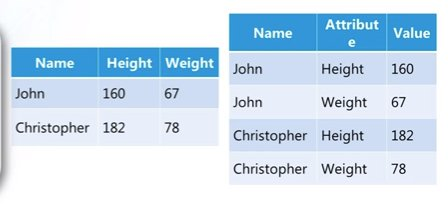

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [75]:
# melt -> simple example branch
# wide to long
a = pd.DataFrame({'cse':[120]})
a

,cse
0,120


In [76]:
# melt
a.melt()

,variable,value
0,cse,120


In [77]:
# melt -> branch with year
b = pd.DataFrame({'cse':[120],'ece':[100],'mechanical':[50]})
b

,cse,ece,mechanical
0,120,100,50


In [79]:
b.melt(var_name='branch', value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mechanical,50


In [80]:
c = pd.DataFrame(
    {
        'branch':['cse','ece','mechanical'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)
c

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mechanical,60,80,70


In [84]:
# # we can stop being row into columns using 'id_vars' parameter
c.melt(id_vars=['branch'])  

,branch,variable,value
0,cse,2020,100
1,ece,2020,150
2,mechanical,2020,60
3,cse,2021,120
4,ece,2021,130
5,mechanical,2021,80
6,cse,2022,150
7,ece,2022,140
8,mechanical,2022,70


In [87]:
c.melt(id_vars=['branch'], var_name='year', value_name='students') 

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mechanical,2020,60
3,cse,2021,120
4,ece,2021,130
5,mechanical,2021,80
6,cse,2022,150
7,ece,2022,140
8,mechanical,2022,70


In [88]:
# melt -> real world example
death = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

In [89]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [90]:
death.shape

(289, 1081)

In [91]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [93]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [95]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'], var_name='date', value_name='num_deaths')
death

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [96]:
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'], var_name='date', value_name='num_cases')
confirm

,Province/State,Country/Region,Lat,Long,date,num_cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [97]:
death.head()

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [98]:
confirm.head()

,Province/State,Country/Region,Lat,Long,date,num_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [101]:
# merging the both datasets
pd.merge(confirm, death, on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]
# confirm.merge(death, on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


# Pivot Table
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns

In [105]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [108]:
df.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [109]:
df.groupby(['sex','smoker'])[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [110]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [111]:
# using pivot table
df.pivot_table(index='sex',columns='smoker', values='total_bill')   # default aggegate function is mean() which is using.

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [112]:
# aggregate function
df.pivot_table(index='sex',columns='smoker', values='total_bill', aggfunc='std')

smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [113]:
df.pivot_table(index='sex',columns='smoker', values='total_bill', aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [114]:
df.pivot_table(index='sex',columns='smoker', values='total_bill', aggfunc='min')


smoker,Yes,No
sex,,
Male,7.25,7.51
Female,3.07,7.25


In [115]:
df.pivot_table(index='sex',columns='smoker', values='total_bill', aggfunc='max')


smoker,Yes,No
sex,,
Male,50.81,48.33
Female,44.30,35.83


In [117]:
# all cols together
df.pivot_table(index='sex', columns='smoker')

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [123]:
df.pivot_table(index='sex', columns='time')

size                 tip           total_bill           
time       Lunch    Dinner     Lunch    Dinner      Lunch     Dinner
sex                                                                 
Male    2.363636  2.701613  2.882121  3.144839  18.048485  21.461452
Female  2.457143  2.461538  2.582857  3.002115  16.339143  19.213077

In [127]:
df.pivot_table(index='sex', columns='smoker')['size']


smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [128]:
df.pivot_table(index='sex', columns='smoker')['tip']


smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [129]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [130]:
# multidimentional
df.pivot_table(index=['sex','smoker'],columns=['day','time'], values='total_bill')

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [131]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'])

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [133]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean', 'tip':'max','total_bill':'sum'}) #applying different agregate function


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [134]:
# margings
df.pivot_table(index='sex',columns='smoker', values='total_bill', aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [136]:
df.pivot_table(index='sex',columns='smoker', values='total_bill', aggfunc='sum', margins=True) # appying margin parameter, default=False

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [137]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean', 'tip':'max','total_bill':'sum'}, margins=True)

size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [138]:
# plotting graphs
df1 = pd.read_csv('/content/expense_data.csv')
df1.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [139]:
df1['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [140]:
# date time
pd.to_datetime(df1['Date'])

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [141]:
df1['Date'] = pd.to_datetime(df1['Date'])


In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [145]:
# extracting month
df1['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [146]:
df1['Month'] = df1['Date'].dt.month_name()

In [147]:
df1.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [150]:
df1.pivot_table(index='Month', columns='Category', values='INR', aggfunc='sum')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [151]:
df1.pivot_table(index='Month', columns='Category', values='INR', aggfunc='sum', fill_value=0) # filling NaN value into 0

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000,2590,196,0,6440.72,0,4800,1790,0,0,400,513.72,914.0
February,0,798,0,0,5579.85,0,2808,20000,0,0,0,1800.00,5078.8
January,1000,0,0,1400,9112.51,0,4580,13178,0,8000,0,200.00,2850.0
March,0,0,0,0,195.00,0,0,900,0,0,0,0.00,30.0
November,2000,0,0,0,3174.40,115,0,2000,3,0,0,0.00,331.0


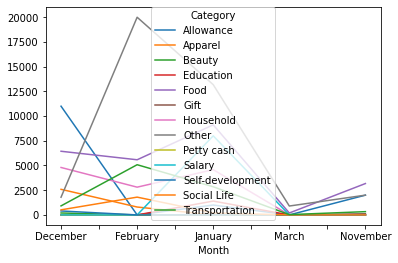

In [152]:
df1.pivot_table(index='Month', columns='Category', values='INR', aggfunc='sum', fill_value=0).plot()

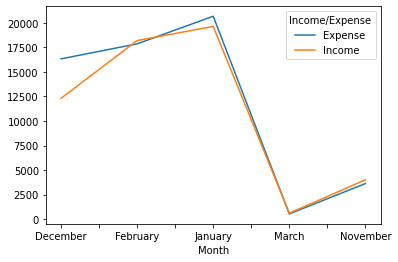

In [153]:
df1.pivot_table(index='Month', columns='Income/Expense', values='INR', aggfunc='sum', fill_value=0).plot()